# Задание 1. Одномерные величины

In [11]:
import pandas as pd
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from matplotlib import mlab
import seaborn as sns
import numpy as np
import scipy.stats as stats
import scipy
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
from sklearn import mixture
from sklearn.preprocessing import StandardScaler
import math

In [2]:
df=pd.read_csv('C:/Users/Julia/Documents/ITMO/Statistical_data_analysis/1_data_preparation/no_gaps_stations/UT_Brigham_City_28_WNW.txt', sep=' ')
df['LST_DATE'] = pd.to_datetime(df['LST_DATE'], format='%Y%m%d')
df

,LST_DATE,SUR_TEMP_DAILY_AVG,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,2018-01-01,-4.3,-2.9,-2.2,-1.4,0.3,3.9
1,2018-01-02,-5.6,-3.5,-2.6,-1.6,0.2,3.9
2,2018-01-03,-6.1,-3.9,-3.1,-2.0,0.1,3.8
3,2018-01-04,-4.1,-3.7,-3.1,-2.2,-0.1,3.8
4,2018-01-05,-2.4,-2.8,-2.5,-2.0,-0.2,3.7
...,...,...,...,...,...,...,...
1019,2020-10-16,7.6,9.2,10.5,11.7,13.8,15.5
1020,2020-10-17,13.2,11.6,11.8,12.0,13.3,15.4
1021,2020-10-18,12.1,12.0,12.4,12.5,13.3,15.1
1022,2020-10-19,11.5,11.8,12.4,12.6,13.4,15.0


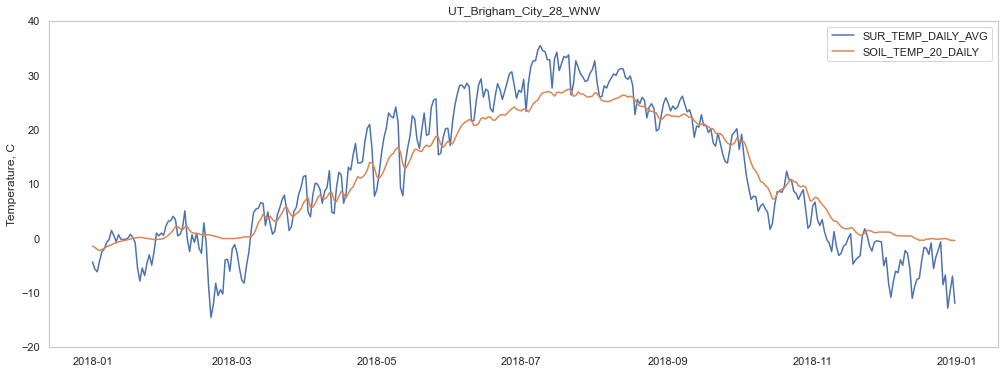

In [3]:
filtered_df=df[(df['LST_DATE'] < '2019-01-01')]
plt.rcParams['figure.figsize'] = [17, 6]
fig, ax = plt.subplots()
ax.plot(filtered_df['LST_DATE'], filtered_df['SUR_TEMP_DAILY_AVG'], label='SUR_TEMP_DAILY_AVG')
#ax.plot(filtered_df['LST_DATE'], filtered_df['SOIL_TEMP_5_DAILY'], label='SOIL_TEMP_5_DAILY')
#ax.plot(filtered_df['LST_DATE'], filtered_df['SOIL_TEMP_10_DAILY'], label='SOIL_TEMP_10_DAILY')
ax.plot(filtered_df['LST_DATE'], filtered_df['SOIL_TEMP_20_DAILY'], label='SOIL_TEMP_20_DAILY')
#ax.plot(filtered_df['LST_DATE'], filtered_df['SOIL_TEMP_50_DAILY'], label='SOIL_TEMP_50_DAILY')
#ax.plot(filtered_df['LST_DATE'], filtered_df['SOIL_TEMP_100_DAILY'], label='SOIL_TEMP_100_DAILY')
ax.set(ylabel='Temperature, C',title='UT_Brigham_City_28_WNW')
plt.ylim((-20,40))
plt.legend()
plt.grid()
plt.show()

###  В качестве оцениваемых переменных выбраны температура поверхности (SUR_TEMP_DAILY_AVG) и на глубине 20 см (SOIL_TEMP_20_DAILY)

### Непараметрические оценки плотности распределения

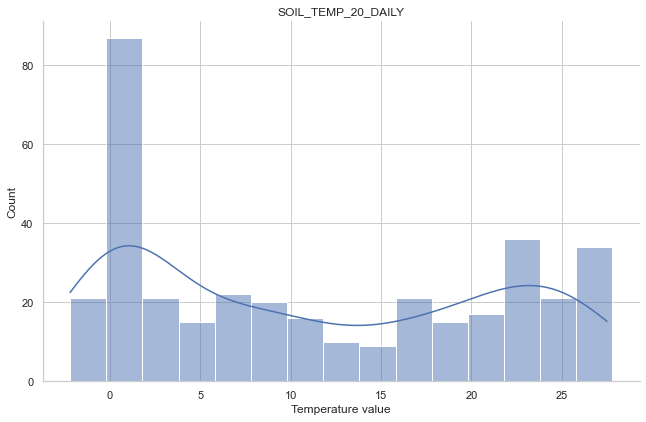

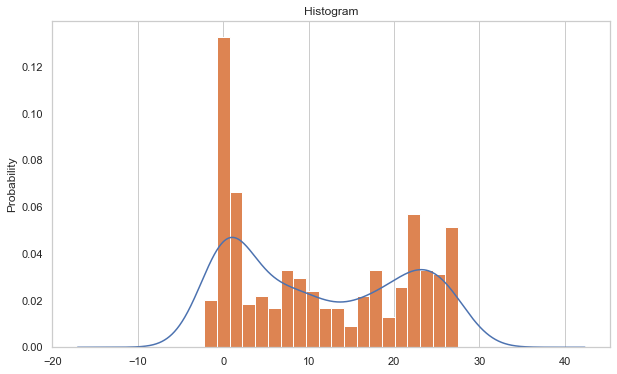

In [4]:
g=sns.displot(filtered_df, x='SOIL_TEMP_20_DAILY', binwidth=2, kde=True)
g.fig.set_size_inches(10,6)
plt.ylabel('Count')
plt.xlabel('Temperature value')
plt.title('SOIL_TEMP_20_DAILY')
plt.show()

plt.rcParams['figure.figsize'] = [10,6]
n_df=filtered_df['SOIL_TEMP_20_DAILY']
fig, ax = plt.subplots()
n_df.plot.kde(ax=ax, legend=False, title='Histogram')
n_df.plot.hist(density=True, ax=ax, bins=20)
ax.set_ylabel('Probability')
ax.grid(axis='y')

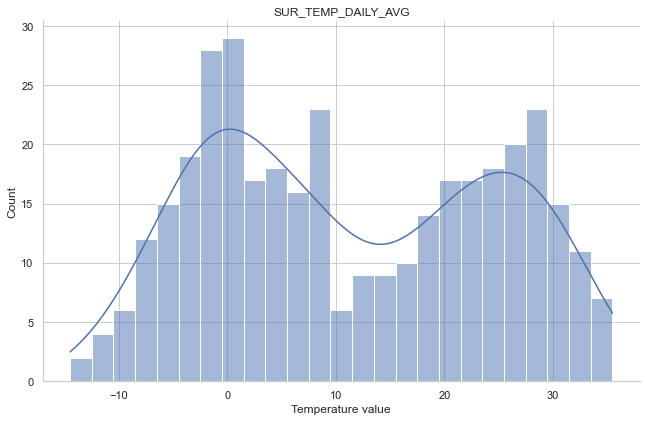

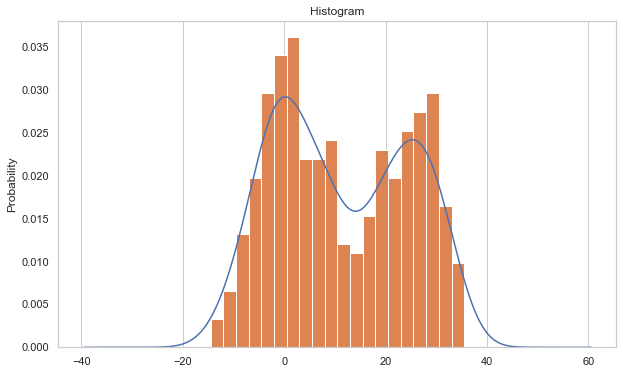

In [63]:
g=sns.displot(filtered_df, x='SUR_TEMP_DAILY_AVG', binwidth=2, kde=True)
g.fig.set_size_inches(10,6)
plt.ylabel('Count')
plt.xlabel('Temperature value')
plt.title('SUR_TEMP_DAILY_AVG')
plt.show()

plt.rcParams['figure.figsize'] = [10,6]
n_df=filtered_df['SUR_TEMP_DAILY_AVG']
fig, ax = plt.subplots()
n_df.plot.kde(ax=ax, legend=False, title='Histogram')
n_df.plot.hist(density=True, ax=ax, bins=20)
ax.set_ylabel('Probability')
ax.grid(axis='y')

## Разделение смеси распределений на два кластера (SOIL_TEMP_20_DAILY)

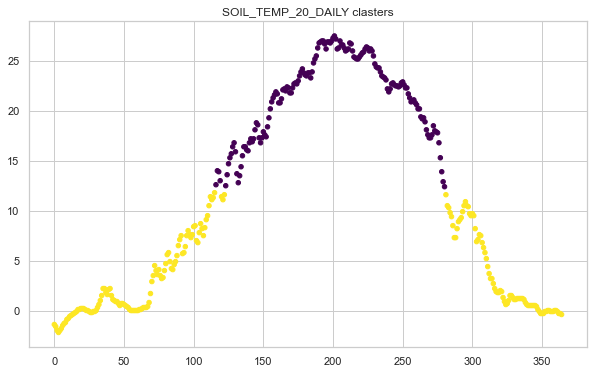

[21.36760012  3.29471948]
[4.31167096 3.98783713]
[0.4444137 0.5555863]


In [30]:
plt.rcParams['figure.figsize'] = [10, 6]
values=filtered_df["SOIL_TEMP_20_DAILY"].to_numpy()
X = values.reshape(365, 1)
gmm = mixture.GaussianMixture(n_components=2, ).fit(X)

labels = gmm.predict(X)
plt.scatter(np.arange(365), X.reshape(1, 365),  c=labels, s=20, cmap='viridis')
plt.title('SOIL_TEMP_20_DAILY clasters')
plt.show()

means_hat = gmm.means_.flatten()
weights_hat = gmm.weights_.flatten()
sds_hat = np.sqrt(gmm.covariances_).flatten()


print(means_hat)
print(sds_hat)
print(weights_hat)


X=X.reshape(1, 365)
labels=labels.reshape(1, 365)
first_gauss_data=X[labels==0]
second_gauss_data=X[labels==1]

## Определение параметров распределения на основе метода максимального правдоподобия (нормальное распределение)  (SOIL_TEMP_20_DAILY)

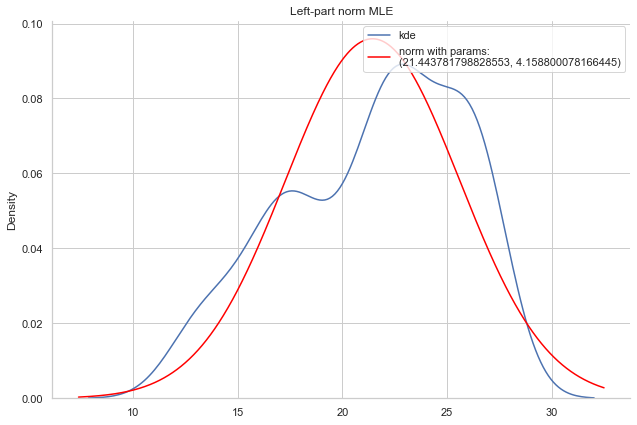

KstestResult(statistic=0.09863684357704017, pvalue=0.07985091321900928)
Power_divergenceResult(statistic=130.6621265265129, pvalue=0.9618469938757647)


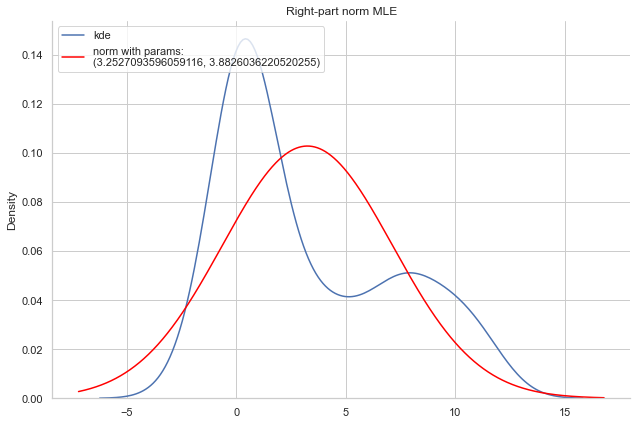

KstestResult(statistic=0.19632631925666172, pvalue=2.485850126102279e-07)
Power_divergenceResult(statistic=940.7990913221263, pvalue=1.2252956506587738e-95)


In [31]:
g=sns.displot(first_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
params = stats.norm.fit(first_gauss_data)
x = np.linspace(np.min(first_gauss_data)-5, np.max(first_gauss_data)+5, 1000)
plt.plot(x, stats.norm.pdf(x, *params), c='red', label='norm with params:\n'+str(stats.norm.fit(first_gauss_data)))
plt.title('Left-part norm MLE')
plt.legend(loc='upper right')
plt.show()

ks = scipy.stats.kstest(first_gauss_data, 'norm', params, N=1000)
chi2 = scipy.stats.chisquare(first_gauss_data)
print(ks)
print(chi2)


g=sns.displot(second_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
params = stats.norm.fit(second_gauss_data)
x = np.linspace(np.min(second_gauss_data)-5, np.max(second_gauss_data)+5, 1000)
plt.plot(x, stats.norm.pdf(x, *params), c='red', label='norm with params:\n'+str(stats.norm.fit(second_gauss_data)))
plt.title('Right-part norm MLE')
plt.legend(loc='upper left')
plt.show()

ks = scipy.stats.kstest(second_gauss_data, 'norm', params, N=1000)
chi2 = scipy.stats.chisquare(second_gauss_data)
print(ks)
print(chi2)

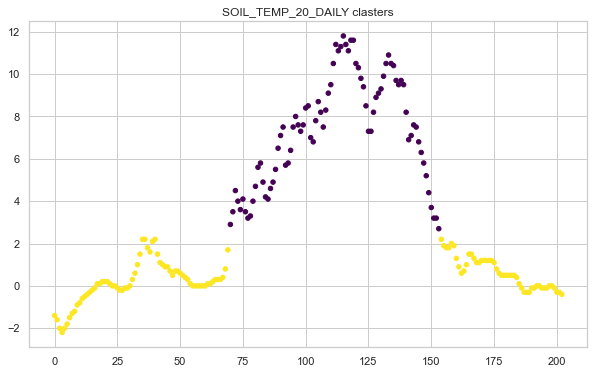

[7.20241685 0.36845787]
[2.73599065 0.95160684]
[0.42204694 0.57795306]


In [32]:
plt.rcParams['figure.figsize'] = [10, 6]
values=second_gauss_data
X = values.reshape(203, 1)
gmm = mixture.GaussianMixture(n_components=2, ).fit(X)

labels = gmm.predict(X)
plt.scatter(np.arange(203), X.reshape(1, 203),  c=labels, s=20, cmap='viridis')
plt.title('SOIL_TEMP_20_DAILY clasters')
plt.show()

means_hat = gmm.means_.flatten()
weights_hat = gmm.weights_.flatten()
sds_hat = np.sqrt(gmm.covariances_).flatten()


print(means_hat)
print(sds_hat)
print(weights_hat)


X=X.reshape(1, 203)
labels=labels.reshape(1, 203)
third_gauss_data=X[labels==0]
forth_gauss_data=X[labels==1]

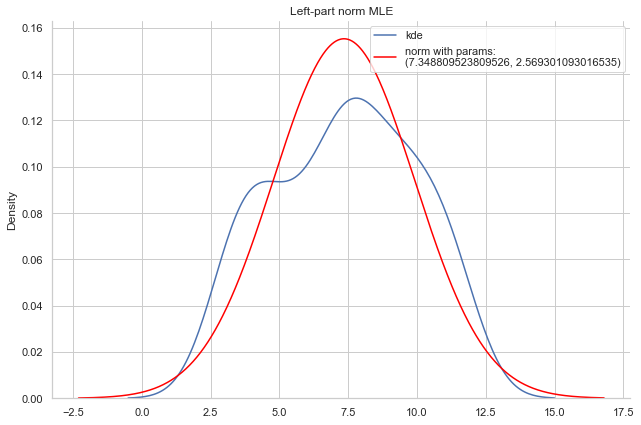

KstestResult(statistic=0.07973114994548186, pvalue=0.6304187812570312)
Power_divergenceResult(statistic=75.45574275068847, pvalue=0.7095662859636881)


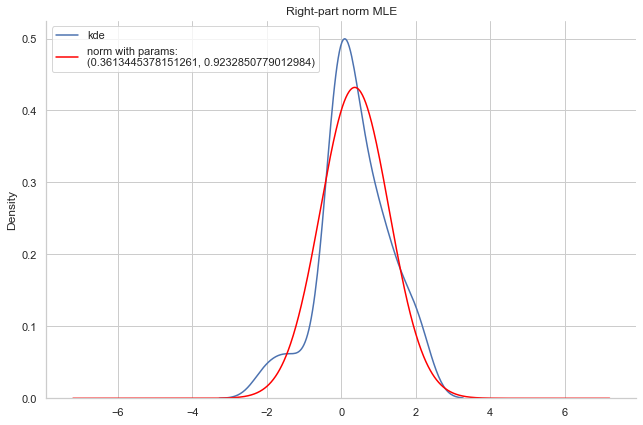

KstestResult(statistic=0.1108541688889117, pvalue=0.09942823036669446)
Power_divergenceResult(statistic=280.73534883720913, pvalue=2.737592868451033e-15)


In [33]:
g=sns.displot(third_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
params = stats.norm.fit(third_gauss_data)
x = np.linspace(np.min(third_gauss_data)-5, np.max(third_gauss_data)+5, 1000)
plt.plot(x, stats.norm.pdf(x, *params), c='red', label='norm with params:\n'+str(stats.norm.fit(third_gauss_data)))
plt.title('Left-part norm MLE')
plt.legend(loc='upper right')
plt.show()

ks = scipy.stats.kstest(third_gauss_data, 'norm', params, N=1000)
chi2 = scipy.stats.chisquare(third_gauss_data)
print(ks)
print(chi2)


g=sns.displot(forth_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
params = stats.norm.fit(forth_gauss_data)
x = np.linspace(np.min(forth_gauss_data)-5, np.max(forth_gauss_data)+5, 1000)
plt.plot(x, stats.norm.pdf(x, *params), c='red', label='norm with params:\n'+str(stats.norm.fit(forth_gauss_data)))
plt.title('Right-part norm MLE')
plt.legend(loc='upper left')
plt.show()

ks = scipy.stats.kstest(forth_gauss_data, 'norm', params, N=1000)
chi2 = scipy.stats.chisquare(forth_gauss_data)
print(ks)
print(chi2)

## Оценки порядковых статистик

In [35]:
quantiles={'0.1': np.quantile(first_gauss_data, 0.1),
           '0.25': np.quantile(first_gauss_data, 0.25),
           '0.50': np.quantile(first_gauss_data, 0.50),
           '0.75': np.quantile(first_gauss_data, 0.75),
           '0.90': np.quantile(first_gauss_data, 0.90)}
print('first_gauss_data:')
print('0.1: '+str(quantiles['0.1']))
print('0.25: '+str(quantiles['0.25']))
print('0.50: '+str(quantiles['0.50']))
print('0.75: '+str(quantiles['0.75']))
print('0.90: '+str(quantiles['0.90']))

first_gauss_data:
0.1: 15.52
0.25: 17.9
0.50: 22.3
0.75: 25.2
0.90: 26.580000000000005


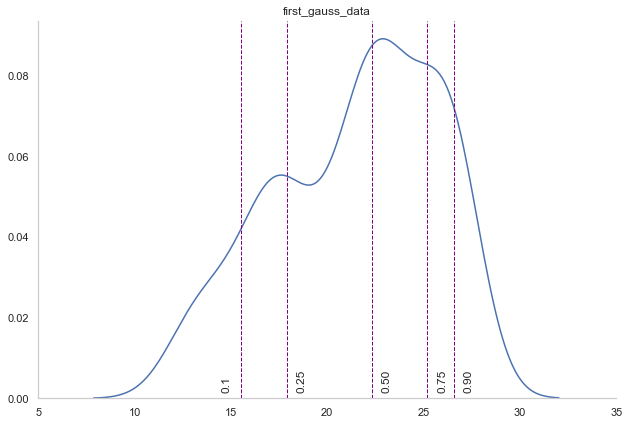

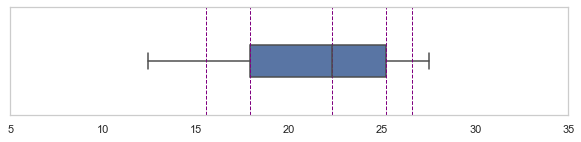

In [37]:
g=sns.displot(first_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
plt.axvline(x=quantiles['0.1'], linewidth=1, color='purple', linestyle='dashed', label='0.1')
plt.axvline(x=quantiles['0.25'], linewidth=1, color='purple', linestyle='dashed', label='0.25')
plt.axvline(x=quantiles['0.50'], linewidth=1, color='purple', linestyle='dashed', label='0.50')
plt.axvline(x=quantiles['0.75'], linewidth=1, color='purple', linestyle='dashed', label='0.75')
plt.axvline(x=quantiles['0.90'], linewidth=1, color='purple', linestyle='dashed', label='0.9')
plt.text(quantiles['0.1']-1,0.002,'0.1', rotation=90)
plt.text(quantiles['0.25']+0.5,0.002,'0.25', rotation=90)
plt.text(quantiles['0.50']+0.5,0.002,'0.50', rotation=90)
plt.text(quantiles['0.75']+0.5,0.002,'0.75', rotation=90)
plt.text(quantiles['0.90']+0.5,0.002,'0.90', rotation=90)
plt.ylabel(None)
plt.xlabel(None)
plt.title('first_gauss_data')
plt.xlim(5, 35)
#plt.axis('off')
plt.grid(False)
plt.show()

plt.rcParams['figure.figsize'] = [10, 2]
sns.boxplot( x=first_gauss_data, width=0.3);
plt.axvline(x=quantiles['0.1'], linewidth=1, color='purple', linestyle='dashed', label='0.1')
plt.axvline(x=quantiles['0.25'], linewidth=1, color='purple', linestyle='dashed', label='0.25')
plt.axvline(x=quantiles['0.50'], linewidth=1, color='purple', linestyle='dashed', label='0.50')
plt.axvline(x=quantiles['0.75'], linewidth=1, color='purple', linestyle='dashed', label='0.75')
plt.axvline(x=quantiles['0.90'], linewidth=1, color='purple', linestyle='dashed', label='0.9')
plt.grid(False)
plt.xlim(5, 35)
plt.show()

In [38]:
quantiles={'0.1': np.quantile(third_gauss_data, 0.1),
           '0.25': np.quantile(third_gauss_data, 0.25),
           '0.50': np.quantile(third_gauss_data, 0.50),
           '0.75': np.quantile(third_gauss_data, 0.75),
           '0.90': np.quantile(third_gauss_data, 0.90)}
print('third_gauss_data:')
print('0.1: '+str(quantiles['0.1']))
print('0.25: '+str(quantiles['0.25']))
print('0.50: '+str(quantiles['0.50']))
print('0.75: '+str(quantiles['0.75']))
print('0.90: '+str(quantiles['0.90']))

third_gauss_data:
0.1: 3.63
0.25: 5.125
0.50: 7.5
0.75: 9.5
0.90: 10.780000000000001


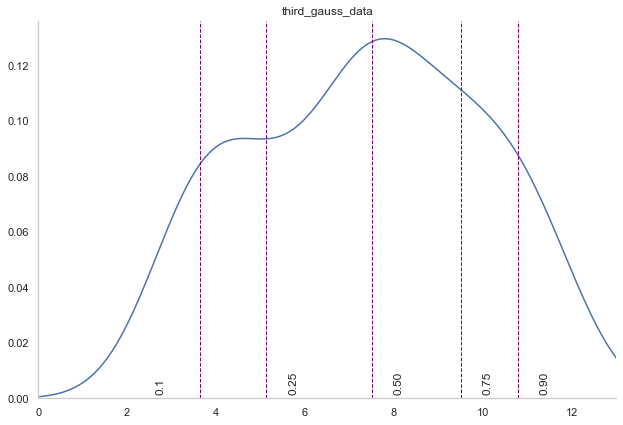

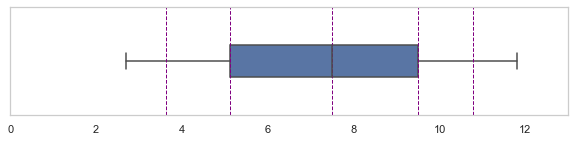

In [42]:
g=sns.displot(third_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
plt.axvline(x=quantiles['0.1'], linewidth=1, color='purple', linestyle='dashed', label='0.1')
plt.axvline(x=quantiles['0.25'], linewidth=1, color='purple', linestyle='dashed', label='0.25')
plt.axvline(x=quantiles['0.50'], linewidth=1, color='purple', linestyle='dashed', label='0.50')
plt.axvline(x=quantiles['0.75'], linewidth=1, color='purple', linestyle='dashed', label='0.75')
plt.axvline(x=quantiles['0.90'], linewidth=1, color='purple', linestyle='dashed', label='0.9')
plt.text(quantiles['0.1']-1,0.002,'0.1', rotation=90)
plt.text(quantiles['0.25']+0.5,0.002,'0.25', rotation=90)
plt.text(quantiles['0.50']+0.5,0.002,'0.50', rotation=90)
plt.text(quantiles['0.75']+0.5,0.002,'0.75', rotation=90)
plt.text(quantiles['0.90']+0.5,0.002,'0.90', rotation=90)
plt.ylabel(None)
plt.xlabel(None)
plt.title('third_gauss_data')
plt.xlim(0, 13)
#plt.axis('off')
plt.grid(False)
plt.show()

plt.rcParams['figure.figsize'] = [10, 2]
sns.boxplot( x=third_gauss_data, width=0.3);
plt.axvline(x=quantiles['0.1'], linewidth=1, color='purple', linestyle='dashed', label='0.1')
plt.axvline(x=quantiles['0.25'], linewidth=1, color='purple', linestyle='dashed', label='0.25')
plt.axvline(x=quantiles['0.50'], linewidth=1, color='purple', linestyle='dashed', label='0.50')
plt.axvline(x=quantiles['0.75'], linewidth=1, color='purple', linestyle='dashed', label='0.75')
plt.axvline(x=quantiles['0.90'], linewidth=1, color='purple', linestyle='dashed', label='0.9')
plt.grid(False)
plt.xlim(0, 13)
plt.show()

In [43]:
quantiles={'0.1': np.quantile(forth_gauss_data, 0.1),
           '0.25': np.quantile(forth_gauss_data, 0.25),
           '0.50': np.quantile(forth_gauss_data, 0.50),
           '0.75': np.quantile(forth_gauss_data, 0.75),
           '0.90': np.quantile(forth_gauss_data, 0.90)}
print('first_gauss_data:')
print('0.1: '+str(quantiles['0.1']))
print('0.25: '+str(quantiles['0.25']))
print('0.50: '+str(quantiles['0.50']))
print('0.75: '+str(quantiles['0.75']))
print('0.90: '+str(quantiles['0.90']))

first_gauss_data:
0.1: -0.5199999999999999
0.25: -0.1
0.50: 0.3
0.75: 1.0
0.90: 1.6200000000000003


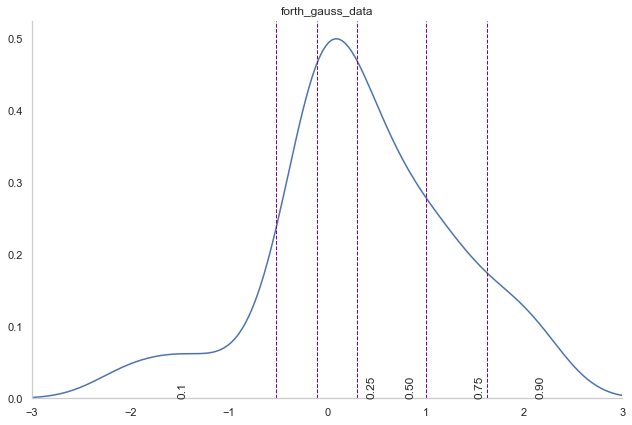

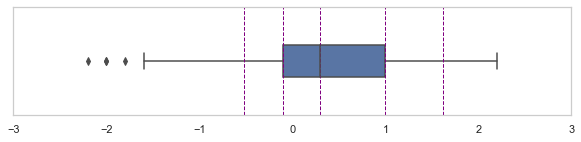

In [51]:
g=sns.displot(forth_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
plt.axvline(x=quantiles['0.1'], linewidth=1, color='purple', linestyle='dashed', label='0.1')
plt.axvline(x=quantiles['0.25'], linewidth=1, color='purple', linestyle='dashed', label='0.25')
plt.axvline(x=quantiles['0.50'], linewidth=1, color='purple', linestyle='dashed', label='0.50')
plt.axvline(x=quantiles['0.75'], linewidth=1, color='purple', linestyle='dashed', label='0.75')
plt.axvline(x=quantiles['0.90'], linewidth=1, color='purple', linestyle='dashed', label='0.9')
plt.text(quantiles['0.1']-1,0.002,'0.1', rotation=90)
plt.text(quantiles['0.25']+0.5,0.002,'0.25', rotation=90)
plt.text(quantiles['0.50']+0.5,0.002,'0.50', rotation=90)
plt.text(quantiles['0.75']+0.5,0.002,'0.75', rotation=90)
plt.text(quantiles['0.90']+0.5,0.002,'0.90', rotation=90)
plt.ylabel(None)
plt.xlabel(None)
plt.title('forth_gauss_data')
plt.xlim(-3, 3)
#plt.axis('off')
plt.grid(False)
plt.show()

plt.rcParams['figure.figsize'] = [10, 2]
sns.boxplot( x=forth_gauss_data, width=0.3);
plt.axvline(x=quantiles['0.1'], linewidth=1, color='purple', linestyle='dashed', label='0.1')
plt.axvline(x=quantiles['0.25'], linewidth=1, color='purple', linestyle='dashed', label='0.25')
plt.axvline(x=quantiles['0.50'], linewidth=1, color='purple', linestyle='dashed', label='0.50')
plt.axvline(x=quantiles['0.75'], linewidth=1, color='purple', linestyle='dashed', label='0.75')
plt.axvline(x=quantiles['0.90'], linewidth=1, color='purple', linestyle='dashed', label='0.9')
plt.grid(False)
plt.xlim(-3, 3)
plt.show()

## Построение квантильного биплота для эмпирического и теоретического  распределения  (SUR_TEMP_DAILY_AVG)

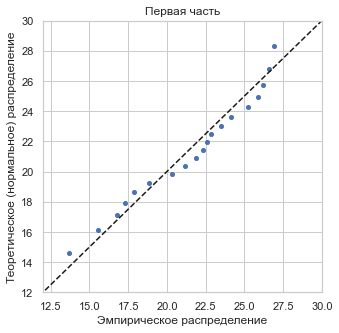

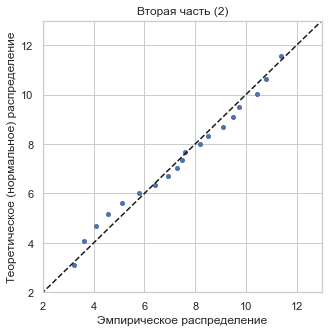

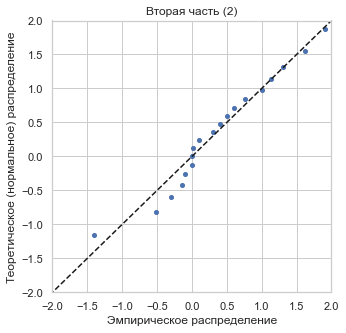

In [62]:
# Расчет квантилей
percs = np.linspace(0, 100, 21)
x = np.linspace(np.min(first_gauss_data)-1, np.max(first_gauss_data)+5, 1000)
qn_first = np.percentile(first_gauss_data, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *stats.norm.fit(first_gauss_data))

# Построение квантильного биплота
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=4)
plt.plot(x, x, color="k", ls="--")
plt.xlim(12, 30)
plt.ylim(12, 30)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (нормальное) распределение')
plt.title('Первая часть')
plt.show()

# Расчет квантилей
percs = np.linspace(0, 100, 21)
x = np.linspace(np.min(third_gauss_data)-1, np.max(third_gauss_data)+5, 1000)
qn_first = np.percentile(third_gauss_data, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *stats.norm.fit(third_gauss_data))

# Построение квантильного биплота
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=4)
plt.plot(x, x, color="k", ls="--")
plt.xlim(2, 13)
plt.ylim(2, 13)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (нормальное) распределение')
plt.title('Вторая часть (2)')
plt.show()

# Расчет квантилей
percs = np.linspace(0, 100, 21)
x = np.linspace(np.min(forth_gauss_data)-1, np.max(forth_gauss_data)+5, 1000)
qn_first = np.percentile(forth_gauss_data, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *stats.norm.fit(forth_gauss_data))

# Построение квантильного биплота
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=4)
plt.plot(x, x, color="k", ls="--")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (нормальное) распределение')
plt.title('Вторая часть (2)')
plt.show()

## Разделение смеси распределений на два кластера (SUR_TEMP_DAILY_AVG)

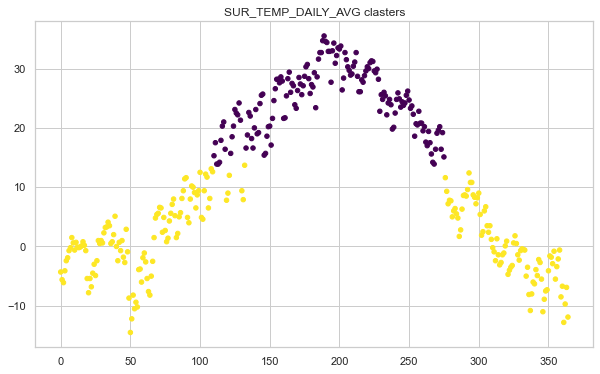

[24.57390417  1.21128139]
[5.64890066 6.43052978]
[0.43476389 0.56523611]


In [64]:
plt.rcParams['figure.figsize'] = [10, 6]
values=filtered_df["SUR_TEMP_DAILY_AVG"].to_numpy()
X = values.reshape(365, 1)
gmm = mixture.GaussianMixture(n_components=2, ).fit(X)

labels = gmm.predict(X)
plt.scatter(np.arange(365), X.reshape(1, 365),  c=labels, s=20, cmap='viridis')
plt.title('SUR_TEMP_DAILY_AVG clasters')
plt.show()

means_hat = gmm.means_.flatten()
weights_hat = gmm.weights_.flatten()
sds_hat = np.sqrt(gmm.covariances_).flatten()


print(means_hat)
print(sds_hat)
print(weights_hat)

X=X.reshape(1, 365)
labels=labels.reshape(1, 365)
first_gauss_data=X[labels==0]
second_gauss_data=X[labels==1]

## Определение параметров распределения на основе метода максимального правдоподобия (нормальное распределение)  (SUR_TEMP_DAILY_AVG)

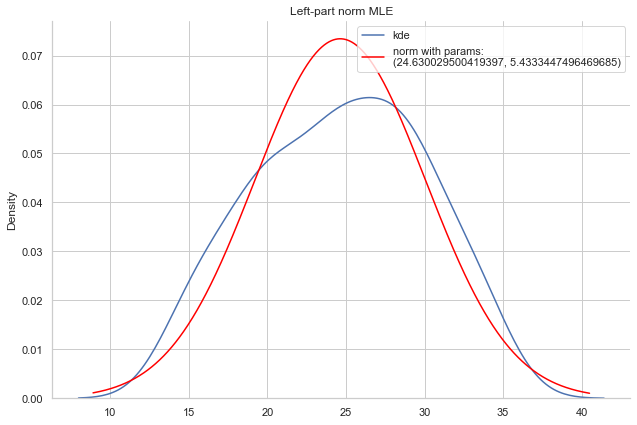

KstestResult(statistic=0.05722257351394355, pvalue=0.6498866164182748)
Power_divergenceResult(statistic=191.77393299030257, pvalue=0.0390611565864204)


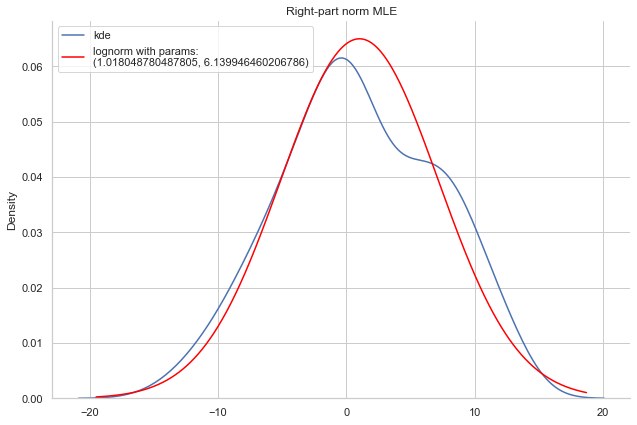

KstestResult(statistic=0.052990211165235945, pvalue=0.5936092212659203)
Power_divergenceResult(statistic=7591.270052707235, pvalue=0.0)


In [65]:
g=sns.displot(first_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
params = stats.norm.fit(first_gauss_data)
x = np.linspace(np.min(first_gauss_data)-5, np.max(first_gauss_data)+5, 1000)
plt.plot(x, stats.norm.pdf(x, *params), c='red', label='norm with params:\n'+str(stats.norm.fit(first_gauss_data)))
plt.title('Left-part norm MLE')
plt.legend(loc='upper right')
plt.show()

ks = scipy.stats.kstest(first_gauss_data, 'norm', params, N=1000)
chi2 = scipy.stats.chisquare(first_gauss_data)
print(ks)
print(chi2)


g=sns.displot(second_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
params = stats.norm.fit(second_gauss_data)
x = np.linspace(np.min(second_gauss_data)-5, np.max(second_gauss_data)+5, 1000)
plt.plot(x, stats.norm.pdf(x, *params), c='red', label='lognorm with params:\n'+str(stats.norm.fit(second_gauss_data)))
plt.title('Right-part norm MLE')
plt.legend(loc='upper left')
plt.show()

ks = scipy.stats.kstest(second_gauss_data, 'norm', params, N=1000)
chi2 = scipy.stats.chisquare(second_gauss_data)
print(ks)
print(chi2)

## Построение квантильного биплота для эмпирического и теоретического  распределения  (SUR_TEMP_DAILY_AVG)

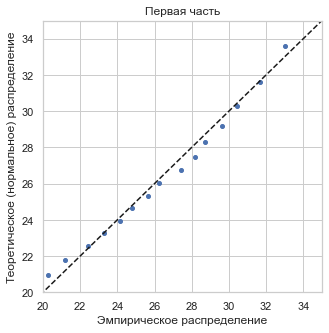

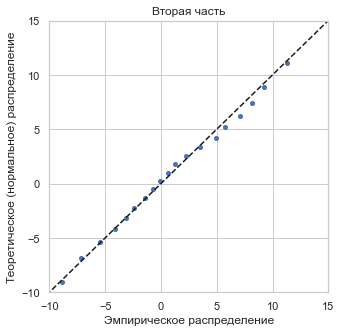

In [68]:
# Расчет квантилей
percs = np.linspace(0, 100, 21)
x = np.linspace(np.min(first_gauss_data)-1, np.max(first_gauss_data)+5, 1000)
qn_first = np.percentile(first_gauss_data, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *stats.norm.fit(first_gauss_data))

# Построение квантильного биплота
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=4)
plt.plot(x, x, color="k", ls="--")
plt.xlim(20, 35)
plt.ylim(20, 35)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (нормальное) распределение')
plt.title('Первая часть')
plt.show()

# Расчет квантилей
percs = np.linspace(0, 100, 21)
x = np.linspace(np.min(second_gauss_data)-1, np.max(second_gauss_data)+5, 1000)
qn_first = np.percentile(second_gauss_data, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *stats.norm.fit(second_gauss_data))

# Построение квантильного биплота
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=4)
plt.plot(x, x, color="k", ls="--")
plt.xlim(-10, 15)
plt.ylim(-10, 15)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (нормальное) распределение')
plt.title('Вторая часть')
plt.show()